In [1]:
function CRRA(cons, γ)
    if γ != 1.0
       return cons^(1.0 - γ) / (1.0 - γ) 
    else
       return log(cons)
    end
end

CRRA (generic function with 1 method)

In [11]:
β = 0.985^30
γ = 2.0
rent = 1.025^30 - 1.0
# added
wH = 1.0
wL = 0.1
p = 0.5

nw = 10
w_max = 1.0
w_min = 0.1
na = 400
a_max = 1.0
a_min = -0.1 #0.0 #0.025

grid_w = collect(LinRange(w_min, w_max, nw))
grid_a = collect(LinRange(a_min, a_max, na))

400-element Vector{Float64}:
 -0.1
 -0.09724310776942358
 -0.09448621553884712
 -0.09172932330827067
 -0.08897243107769424
 -0.0862155388471178
 -0.08345864661654136
 -0.08070175438596491
 -0.07794486215538848
 -0.07518796992481204
 -0.0724310776942356
 -0.06967418546365915
 -0.06691729323308271
  ⋮
  0.9696741854636591
  0.9724310776942355
  0.9751879699248119
  0.9779448621553885
  0.9807017543859649
  0.9834586466165414
  0.9862155388471178
  0.9889724310776943
  0.9917293233082706
  0.9944862155388471
  0.9972431077694235
  1.0

In [8]:
# Define arrays (variables) beforehand
obj = zeros(na, nw) # Objective function

# Calculate the lifetime utility all the possible combinations of (w,a)

for i = 1:nw # for all w
    for j = 1:na # for all a
#         cons = grid_w[i] - grid_a[j] # c1 = w - a
        c1 = grid_w[i] - grid_a[j]

        if c1 > 0.0
            c2H = (1.0+rent)*grid_a[j] + wH
            c2L = (1.0+rent)*grid_a[j] + wL

            if c2L > 0.0
                obj[j,i] = CRRA(c1, γ) + β*p*CRRA(c2H, γ) + β*(1-p)*CRRA(c2L, γ)
            else
                obj[j,i] = -10000.0
            end
        else
            # If consumption is negative, give a penalty so that it will not be chosen
            obj[j,i] = -10000.0
        end
    end
end


In [12]:
pol = zeros(nw) # Policy function

# Find a so as to maximize the lifetime utility for each w
for i = 1:nw
    maxv, maxl = findmax(obj[:,i]);
    pol[i] = grid_a[maxl];
end

pol

10-element Vector{Float64}:
 -0.06967418546365915
 -0.0393483709273183
 -0.006265664160401016
  0.024060150375939837
  0.05714285714285712
  0.09022556390977442
  0.1233082706766917
  0.156390977443609
  0.1894736842105263
  0.22255639097744356

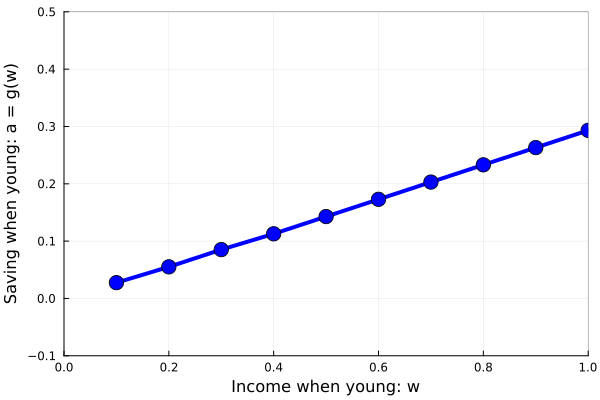

In [10]:
using Plots
plt = plot(grid_w, pol,
    color = :blue,
    marker = :circle,
    legend = :none,
    xlims = (0, 1.0),
    ylims = (-0.1, 0.5),
    xlabel = ("Income when young: w"),
    ylabel = ("Saving when young: a = g(w)"),
    linewidth = 4,
    markersize = 8,
#     titlefont = font("HackGen35Nerd", 12),
#     guidefont = font("HackGen35Nerd", 12),
#     tickfont = font("HackGen35Nerd", 8),
    framestyle = :semi
)